In [49]:
# Import libraries
import pandas as pd
import numpy as np
from path import Path

import plotly.express as px
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [50]:
# To look at all rows with display command
pd.set_option('display.max_rows', None)

In [54]:
# Load the World Happiness Report 2021 complete dataset.
file_path = "Resources/Happiness_final.csv"
happiness_df = pd.read_csv(file_path)
print(happiness_df.shape)
happiness_df.head(10)

(145, 13)


,Country name,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,IS_HAPPY,Unemployment rate,Index of institutional trust,Gini coefficient of income
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,1,7.525,0.550,25.9
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,1,4.798,0.572,27.8
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,1,5.321,0.660,30.1
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,1,5.401,0.325,24.1
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,1,4.010,0.522,27.0
5,Norway,Western Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270,1,4.985,0.606,24.8
6,Sweden,Western Europe,7.363,10.867,0.934,72.7,0.945,0.086,0.237,1,8.661,0.451,27.0
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.6,0.907,-0.034,0.386,1,5.227,0.595,30.9
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242,1,4.124,0.527,34.1
9,Austria,Western Europe,7.268,10.906,0.934,73.3,0.908,0.042,0.481,1,6.301,0.358,26.8


In [55]:
# Check for missing values.
happiness_df.isnull().sum()

Country name                    0
Regional indicator              0
Happiness score                 0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
IS_HAPPY                        0
Unemployment rate               0
Index of institutional trust    0
Gini coefficient of income      0
dtype: int64

In [58]:
# Summary statistics
happiness_df.describe()

,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,IS_HAPPY,Unemployment rate,Index of institutional trust,Gini coefficient of income
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.00000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.526786,9.421717,0.814014,64.926662,0.792048,-0.01580,0.726241,0.496552,8.076662,0.313186,37.654621
std,1.079621,1.161788,0.116259,6.799334,0.114128,0.15045,0.180640,0.501721,5.806339,0.170696,8.348505
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.28800,0.082000,0.000000,0.612000,0.046000,23.200000
25%,4.852000,8.541000,0.746000,59.305000,0.718000,-0.12600,0.667000,0.000000,4.352000,0.189000,32.100000
50%,5.477000,9.569000,0.832000,66.603000,0.806000,-0.03600,0.781000,0.000000,6.301000,0.287000,36.390000
75%,6.223000,10.382000,0.906000,69.593000,0.879000,0.07900,0.845000,1.000000,10.447000,0.415000,43.710000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.54200,0.939000,1.000000,33.558998,0.906000,65.426000


<function matplotlib.pyplot.show(close=None, block=None)>

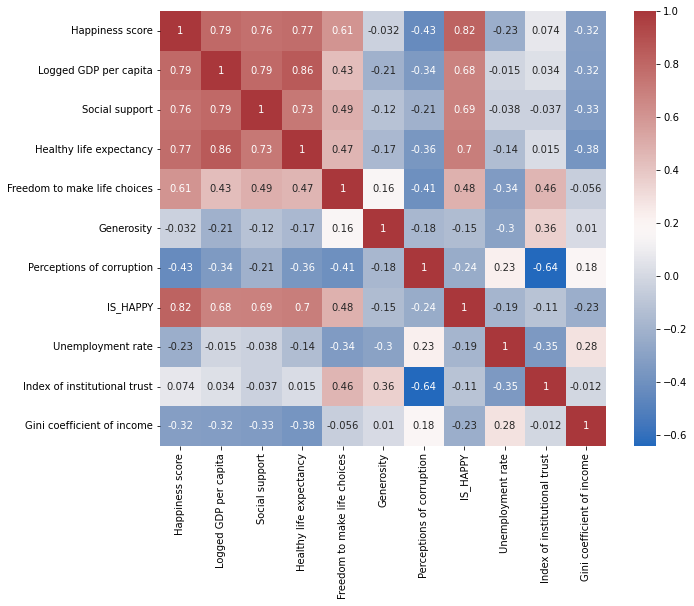

In [56]:
# plotting correlation matrix of all indicators.
fig, ax = plt.subplots(figsize=(10, 8))
dataplot = sns.heatmap(happiness_df.corr(), cmap="vlag", annot=True, ax=ax)
  
# display heatmap
plt.show

In [61]:
# Find Median of Happiness score by regions.
hpp_reg = happiness_df.groupby(['Regional indicator'])['Happiness score'].median().reset_index()
hpp_reg

,Regional indicator,Happiness score
0,Central and Eastern Europe,6.0550
1,Commonwealth of Independent States,5.4715
2,East Asia,5.6770
3,Latin America and Caribbean,5.9920
4,Middle East and North Africa,4.9025
5,North America and ANZ,7.1430
6,South Asia,4.9340
7,Southeast Asia,5.3840
8,Sub-Saharan Africa,4.6160
9,Western Europe,7.1200


In [65]:
# Plotting bar chart of median happiness score by region
fig = px.bar(hpp_reg, x='Regional indicator', y='Happiness score',
              color='Happiness score', height=400,
              title="Happiness by Region")
             
fig.show()

In [97]:
# Box Plot of IS_HAPPY and Healthy life expectancy
fig = px.box(happiness_df, x="IS_HAPPY", y="Healthy life expectancy",
             width=400, height=500
            )
fig.show()

In [98]:
# Box Plot of IS_HAPPY and Social support
fig = px.box(happiness_df, x="IS_HAPPY", y="Social support", width=400, height=500
            )
fig.show()

In [99]:
# Box Plot of IS_HAPPY and Logged GDP per capita
fig = px.box(happiness_df, x="IS_HAPPY", y="Logged GDP per capita",width=400, height=500
            )
fig.show()

In [100]:
# Box Plot of IS_HAPPY and Unemployment rate
fig = px.box(happiness_df, x="IS_HAPPY", y="Unemployment rate",width=400, height=500
            )
fig.show()

In [106]:
# Scatter plot of Healthy life expectancy and Happiness score
fig = px.scatter(happiness_df, x="Healthy life expectancy", y="Happiness score",
         hover_name="Country name", size_max=60)
fig.show()

In [104]:
# Scatter plot of Logged GDP per capita and Happiness score
fig = px.scatter(happiness_df, x="Logged GDP per capita", y="Happiness score",
         hover_name="Country name", size_max=60)
fig.show()

In [107]:
# Scatter plot of Social support and Happiness score
fig = px.scatter(happiness_df, x="Social support", y="Happiness score",
         hover_name="Country name", size_max=60)
fig.show()

In [108]:
# Scatter plot of Unemployment rate and Happiness score
fig = px.scatter(happiness_df, x="Unemployment rate", y="Happiness score",
         hover_name="Country name", size_max=60)
fig.show()

In [109]:
# Scatter plot of Freedom to make life choices and Happiness score
fig = px.scatter(happiness_df, x="Freedom to make life choices", y="Happiness score",
         hover_name="Country name", size_max=60)
fig.show()

In [110]:
# Scatter plot of Index of institutional trust and Happiness score
fig = px.scatter(happiness_df, x="Index of institutional trust", y="Happiness score",
         hover_name="Country name", size_max=60)
fig.show()

In [111]:
# Scatter plot of Gini coefficient of income and Happiness score
fig = px.scatter(happiness_df, x="Gini coefficient of income", y="Happiness score",
         hover_name="Country name", size_max=60)
fig.show()         

In [112]:
# Scatter plot of Generosity and Happiness score
fig = px.scatter(happiness_df, x="Generosity", y="Happiness score",
         hover_name="Country name", size_max=60)
fig.show() 